In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%store -r df

In [3]:
df

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,year_of_registration,gearbox,power_ps,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993.0,manually,0,golf,150000,0,gasoline,volkswagen,no,2016-03-24,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011.0,manually,190,golf,125000,5,diesel,audi,yes,2016-03-24,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004.0,automatic,163,grand,125000,8,diesel,jeep,no,2016-03-14,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001.0,manually,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008.0,manually,69,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,limousine,2005.0,manually,0,golf,20000,1,gasoline,sonstige_autos,no,2016-03-14,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000.0,automatic,101,fortwo,125000,3,gasoline,smart,no,2016-03-05,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996.0,manually,102,transporter,150000,3,diesel,volkswagen,no,2016-03-19,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002.0,manually,100,golf,150000,6,diesel,volkswagen,no,2016-03-20,40764,2016-03-24 12:45:21


# The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?


In [4]:
df.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'year_of_registration', 'gearbox', 'power_ps', 'model',
       'kilometer', 'month_of_registration', 'fuel_type', 'brand',
       'not_repaired_damage', 'date_created', 'postal_code', 'last_seen'],
      dtype='object')

In [5]:
df.drop(["date_crawled"],axis=1,inplace=True)

In [6]:
df.drop(["date_created"],axis=1,inplace=True)

In [7]:
df.drop(["postal_code"],axis=1,inplace=True)

In [8]:
df.drop(["last_seen"],axis=1,inplace=True)

In [9]:
df["price"]=df["price"].astype(np.int32)

In [10]:
df["kilometer"]=df["kilometer"].astype(np.int32)

In [11]:
df["month_of_registration"]=df["month_of_registration"].astype(np.int8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   name                   371528 non-null  object 
 1   seller                 371528 non-null  object 
 2   offer_type             371528 non-null  object 
 3   price                  371528 non-null  int32  
 4   ab_test                371528 non-null  object 
 5   vehicle_type           371528 non-null  object 
 6   year_of_registration   371346 non-null  float64
 7   gearbox                371528 non-null  object 
 8   power_ps               371528 non-null  int64  
 9   model                  371528 non-null  object 
 10  kilometer              371528 non-null  int32  
 11  month_of_registration  371528 non-null  int8   
 12  fuel_type              371528 non-null  object 
 13  brand                  371528 non-null  object 
 14  not_repaired_damage    371528 non-nu

# What is the Average price of vehicle by fuel type and gearbox type.Give a plot

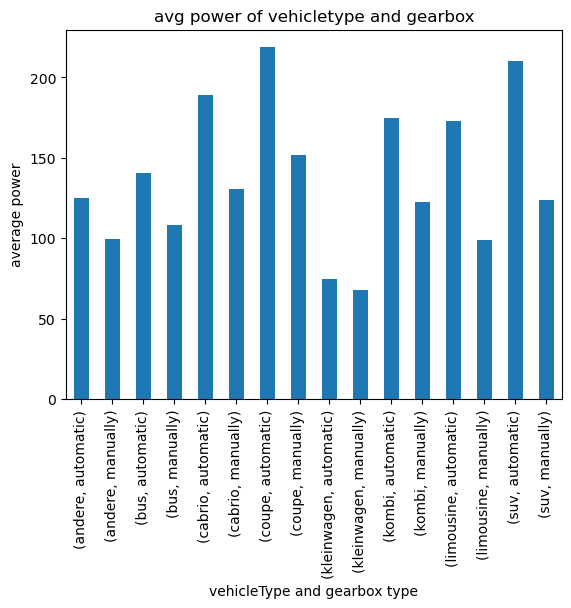

In [13]:
avg_power=df.groupby(["vehicle_type","gearbox"])["power_ps"].mean()
avg_power.plot(kind="bar")
plt.xlabel("vehicleType and gearbox type")
plt.ylabel("average power")
plt.title("avg power of vehicletype and gearbox")
plt.show()

# What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot


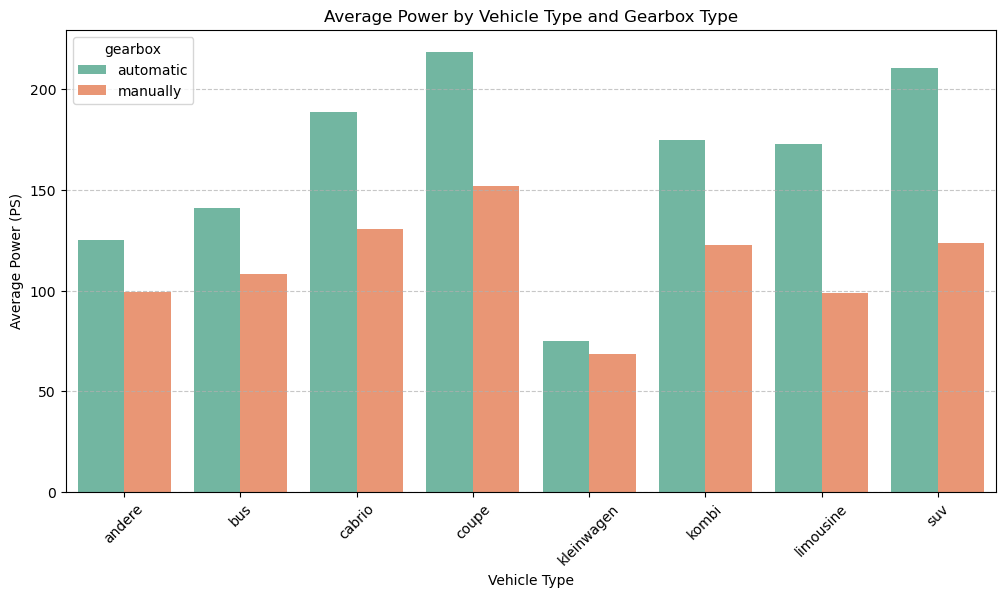

In [16]:
average_power = df.groupby(['vehicle_type', 'gearbox'])['power_ps'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='vehicle_type', y='power_ps', hue='gearbox', data=average_power, palette='Set2')
plt.title('Average Power by Vehicle Type and Gearbox Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Power (PS)')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this


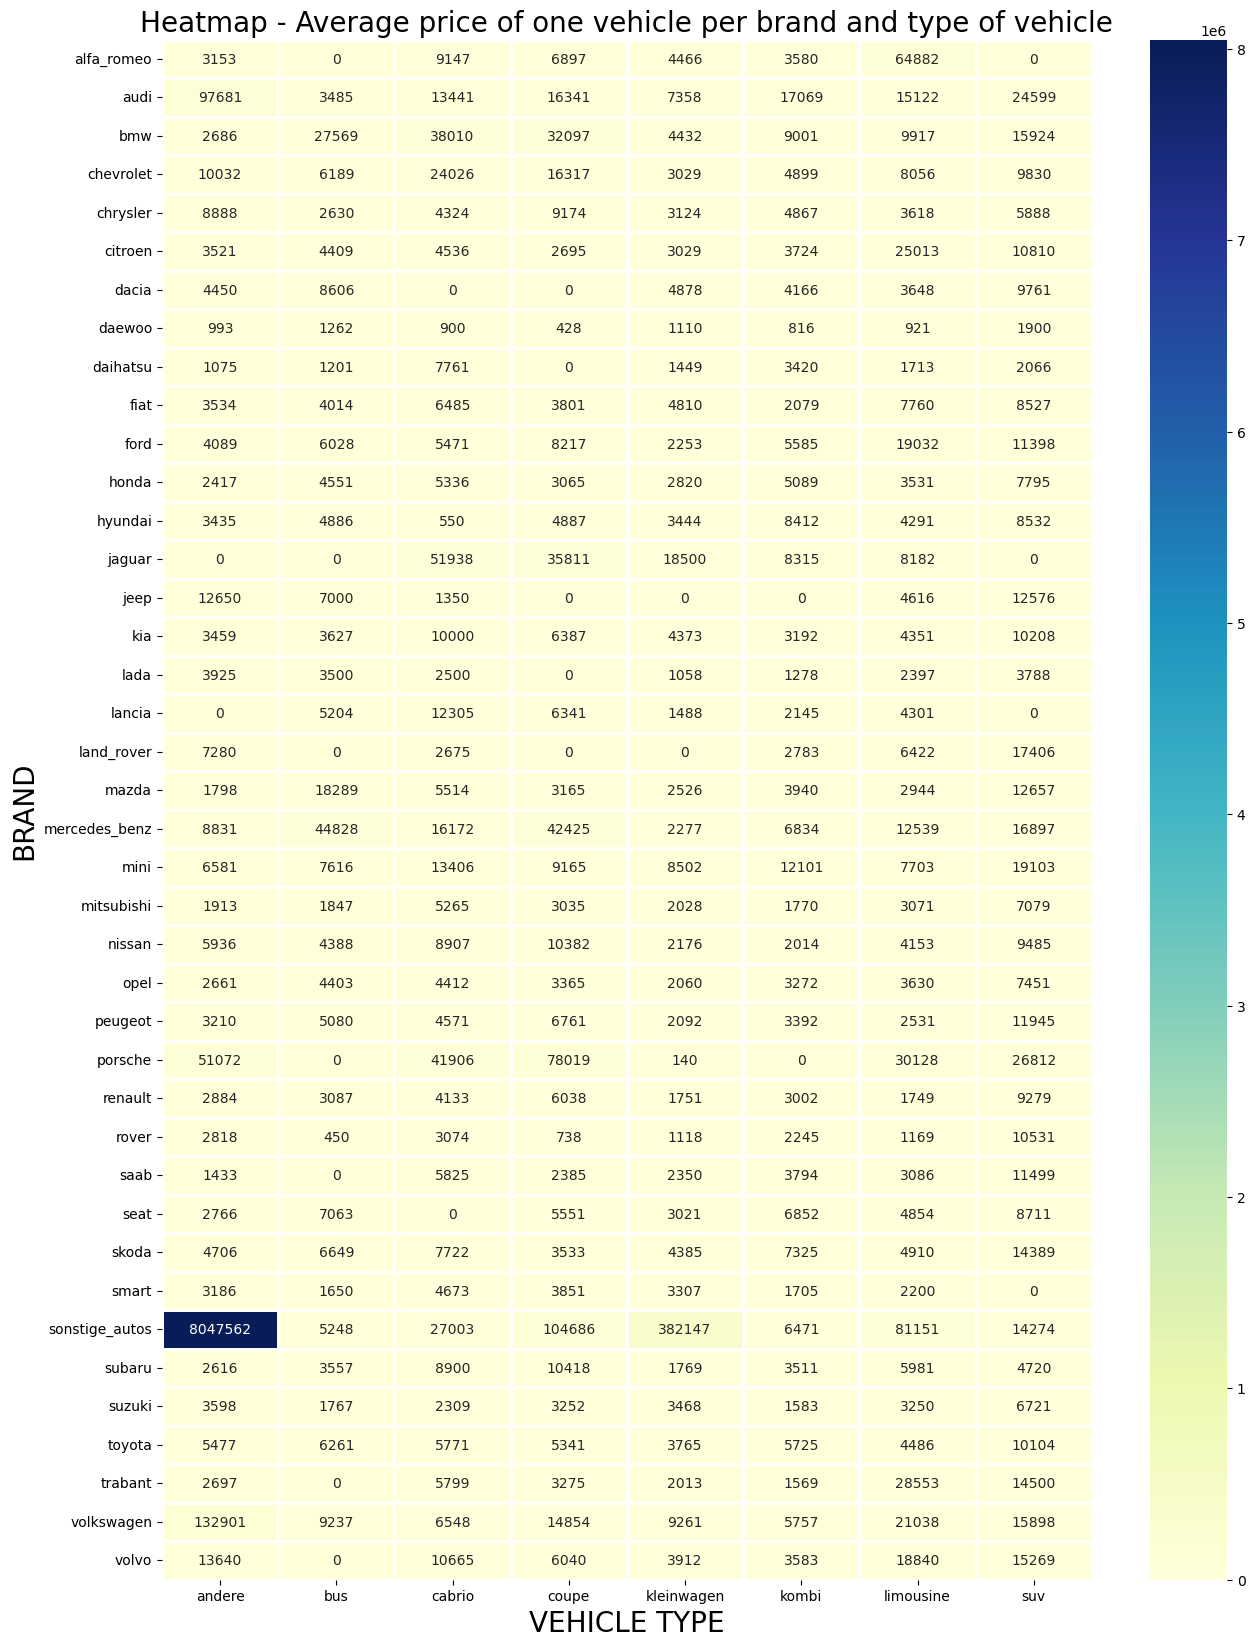

In [17]:
average_prices_list = []

for brand in df['brand'].unique():
    for vehicle_type in df['vehicle_type'].unique():
        subset = df[(df['brand'] == brand) & (df['vehicle_type'] == vehicle_type)]
        average_price = subset['price'].mean()
        average_prices_list.append({'brand': brand, 'vehicle_type': vehicle_type, 'avgPrice': average_price})

trial = pd.DataFrame(average_prices_list)

trial.reset_index(drop=True, inplace=True)



trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)

tri = trial.pivot(index="brand", columns="vehicle_type", values="avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Average price of one vehicle per brand and type of vehicle",fontdict={'size':20})
ax.xaxis.set_label_text("VEHICLE TYPE",fontdict= {'size':20})
ax.yaxis.set_label_text("BRAND",fontdict= {'size':20})
plt.show()
